# Validación cruzada

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold

In [2]:
np.random.seed(13) 
mapeo_colores = {'A':'green','B':'red'}
N = 100
media_A, desvio_A = 10, 2
media_B, desvio_B = 12, 6


valores_A_X = np.random.normal(loc=media_A, scale=desvio_A, size=N)
valores_A_Y = np.random.normal(loc=media_A, scale=desvio_A, size=N)

valores_B_X = np.random.normal(loc=media_B, scale=desvio_B, size=N)
valores_B_Y = np.random.normal(loc=media_B, scale=desvio_B, size=N)

df = pd.DataFrame({
    'grupo': ['A'] * N + ['B'] * N,
    'X': np.concatenate([valores_A_X, valores_B_X]),
    'Y': np.concatenate([valores_A_Y, valores_B_Y])
})

X = df[['X', 'Y']].values
y = df['grupo'].values

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)
data_metrics = []
for k in [1,3,5,7,9,12]:
    fold = 1
    for train_index, test_index in skf.split(X, y):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

    
        knn = neighbors.KNeighborsClassifier(n_neighbors=k)

        knn.fit(X_train, y_train)

        y_pred = knn.predict(X_test)
        df_valid = pd.DataFrame(X_test, columns=['X', 'Y'])
        df_valid['target'] = y_test
        df_valid['y_pred'] = y_pred
        df_valid['target'] = df_valid['target'].map({'A': 0, 'B': 1})
        df_valid['y_pred'] = df_valid['y_pred'].map({'A': 0, 'B': 1})
        
        acc = accuracy_score(df_valid['target'],df_valid['y_pred'])
        prec = precision_score(df_valid['target'],df_valid['y_pred'])
        f1_s = f1_score(df_valid['target'],df_valid['y_pred'])

        data_metrics.append({'k': k,'fold': fold,'acc': acc, 'prec': prec, 'f1_score': f1_s})
        

        
        fold+=1

        #print ('Acc:', acc)
        #print ('Precisión: ',prec)
        #print ('F1 Score: ', f1_s)
df_metrics = pd.DataFrame(data_metrics)


In [40]:
df_metrics

,k,fold,acc,prec,f1_score
0,1,1,0.800,0.928571,0.764706
1,1,2,0.800,0.772727,0.809524
2,1,3,0.825,0.782609,0.837209
3,1,4,0.850,0.937500,0.833333
4,1,5,0.875,0.857143,0.878049
5,3,1,0.825,0.933333,0.800000
6,3,2,0.850,0.850000,0.850000
7,3,3,0.900,0.863636,0.904762
8,3,4,0.850,0.937500,0.833333
9,3,5,0.925,0.904762,0.926829


K vecinos:  1
   k  fold    acc      prec  f1_score
0  1     1  0.800  0.928571  0.764706
1  1     2  0.800  0.772727  0.809524
2  1     3  0.825  0.782609  0.837209
3  1     4  0.850  0.937500  0.833333
4  1     5  0.875  0.857143  0.878049


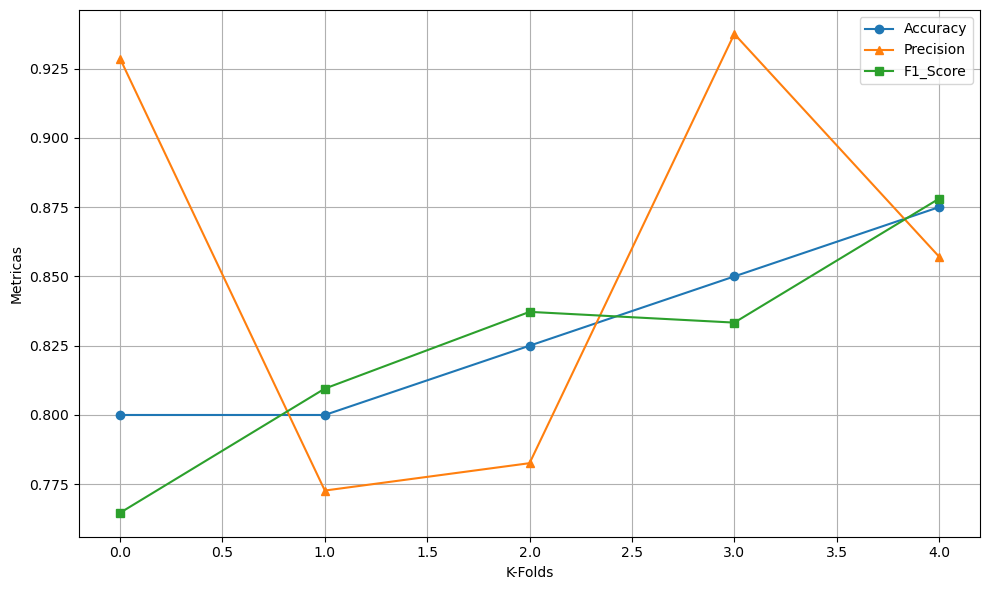

K vecinos:  3
   k  fold    acc      prec  f1_score
5  3     1  0.825  0.933333  0.800000
6  3     2  0.850  0.850000  0.850000
7  3     3  0.900  0.863636  0.904762
8  3     4  0.850  0.937500  0.833333
9  3     5  0.925  0.904762  0.926829


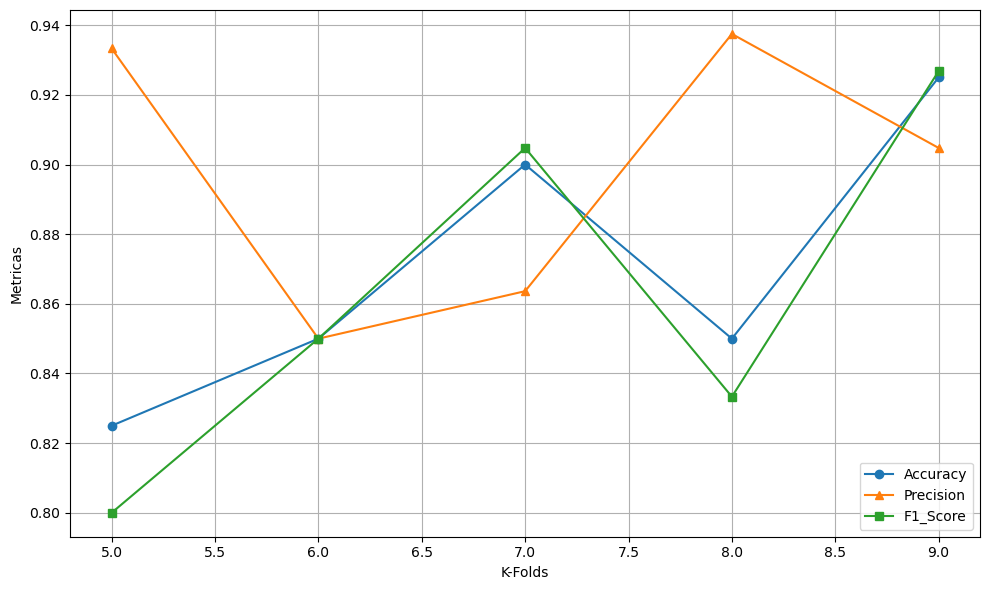

K vecinos:  5
    k  fold    acc      prec  f1_score
10  5     1  0.850  1.000000  0.823529
11  5     2  0.800  0.800000  0.800000
12  5     3  0.900  0.863636  0.904762
13  5     4  0.825  0.933333  0.800000
14  5     5  0.950  0.950000  0.950000


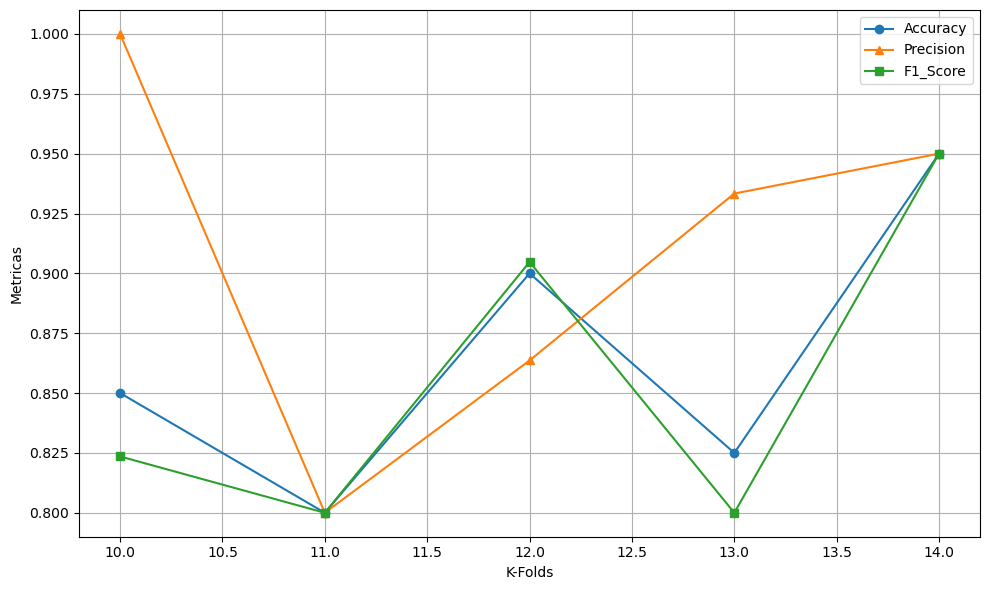

K vecinos:  7
    k  fold    acc      prec  f1_score
15  7     1  0.850  1.000000  0.823529
16  7     2  0.800  0.800000  0.800000
17  7     3  0.925  0.904762  0.926829
18  7     4  0.825  0.933333  0.800000
19  7     5  0.975  1.000000  0.974359


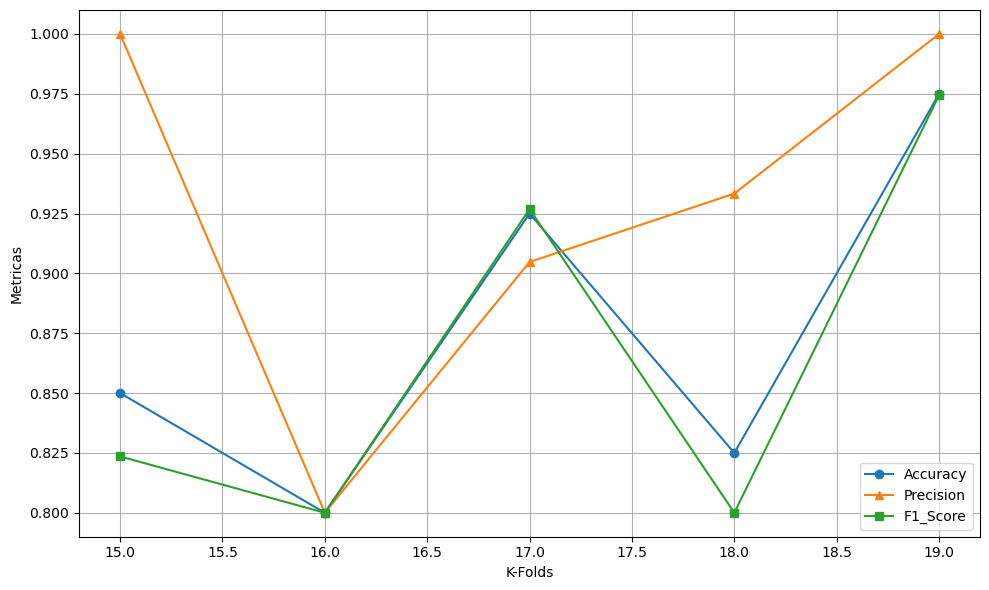

K vecinos:  9
    k  fold    acc      prec  f1_score
20  9     1  0.850  1.000000  0.823529
21  9     2  0.800  0.800000  0.800000
22  9     3  0.925  0.904762  0.926829
23  9     4  0.850  1.000000  0.823529
24  9     5  0.975  1.000000  0.974359


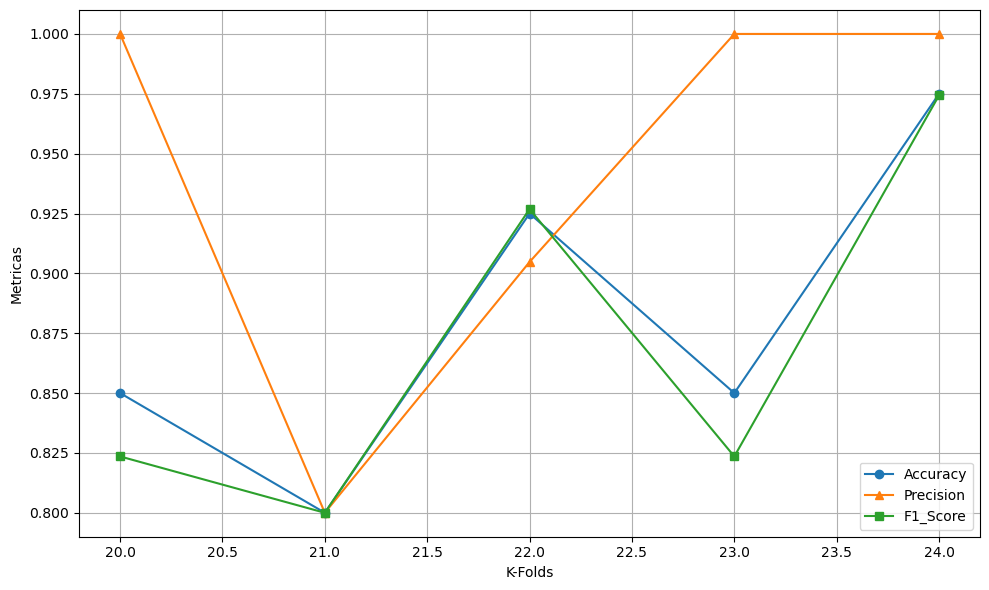

K vecinos:  12
     k  fold    acc      prec  f1_score
25  12     1  0.825  1.000000  0.787879
26  12     2  0.825  0.842105  0.820513
27  12     3  0.925  0.947368  0.923077
28  12     4  0.850  1.000000  0.823529
29  12     5  0.950  1.000000  0.947368


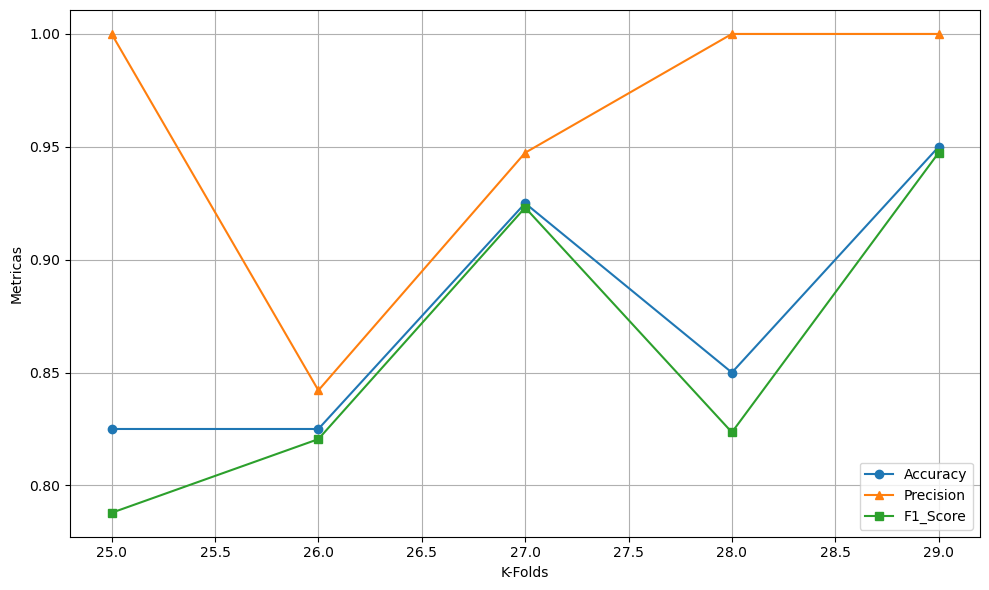

In [49]:
for k in k_values:
    print('K vecinos: ', k)
    dff= df_metrics[df_metrics['k'] == k]
    print(dff)
    plt.figure(figsize=(10, 6))
    plt.plot(dff.index,dff['acc'],marker = 'o', label = 'Accuracy')
    plt.plot(dff.index,dff['prec'],marker = '^', label = 'Precision')
    plt.plot(dff.index,dff['f1_score'],marker = 's', label = 'F1_Score')
    plt.xlabel('K-Folds')
    plt.ylabel('Metricas')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    plt.show()

# GridSearch